# Mean Shift 군집화

## Mean Shift 군집화
- Mean Shift는 KDE(Kernel Density Estimation)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행

- 별도의 군집화 개수를 지정하지 않으며 Mean Shift는 데이터 분포도에 기반하여 자동으로 군집화 개수를 정함. 

## Mean Shift 수행 절차

- <img src="../images/mean_shift.png" width="1000px" height="400px" title="mean shift 수행 절차"></img>


## KDE(Kernel Density Estimation)

- KDE는 커널함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 방식, 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나누어서 활률밀도 함수를 추정

    - 확률밀도 함수(PDF:Probability Density Function)
        - 확률 변수의 분포를 나타내는 함수. 대표적으로 정규분포, 감마분포, t-분포등이 있음
    
    - 확률밀도 함수를 알게되면 특정 변수가 어떤 값을 갖게될지의 활률을 알게 되었음을 의미
        - 즉, 확률밀도 함수를 통해 변수의 특성(예를 들어 정규 분포의 경우 평균, 분산), 확률 분포등 변수의 많은 요소를 알 수 있게 됨.

## 확률 밀도 추정 방법

- 모수적(Parametric) 추정
    - 데이터가 특정 데이터 분포(예를 들어 가우시안 분포)를 따른다는 가정하에 데이터 분포를 찾는 방법. Gaussian Mixture 등이 있음

- 비모수적(Non-Parametric) 추정
    - 데이터가 특정 분포를 따르지 않는다는 가정 하에서 밀도를 추정. 관측된 데이터 만으로 확률 밀도를 찾는 방법으로서 대표적으로 KDE가 있음


## 비모수적 밀도 추정 - 히스토그램(Histogram)

- 히스토그램 밀도 추정의 문제점
    - Bin의 경계에서 불연속성이 나타남
    - Bin의 크기에 따라 히스토그램이 달라짐

## 비모수적 밀도 추정 - KDE
- KDE는 개별 관측 데이터들에 커널함수를 적용한 뒤, 커널함수들의 적용값을 모두 합한 뒤에 개별 관측 데이터의 건수로 나누어서 확률밀도 함수를 추정하는 방식임. 커널함수로는 대표적으로 가우시안 분포함수가 사용됨.
    - <img src="../images/kde.jpg" width="1000px" height="400px" title="가우시안 커널 함수"></img>

## KDE와 가우시안 커널함수
- <img src="../images/kde함수.png" width="1000px" height="400px" title="가우시안 커널 함수"></img>


## Bandwidth에 따른 KDE의 변화
- 작은 h 값은 좁고 Spike한 KDE로 변동성이 큰 확률밀도함수를 추정(오버피팅)

- 큰 h 값은 과도하게 Smoothing된 KDE로 단순화된 확률밀도함수를 추정(언더피팅)

- Mean Shift는 Bandwidth가 클수록 적은 수의 클러스터링 중심점을, Bandwidth가 작을수록 많은 수의 클러스터링 중심점을 가지게 됨. 또한 Mean Shift는 군집의 개수를 지정하지 않으며, 오직 Bandwidth의 크기에 따라 군집화를 수행.
    - <img src="../images/kde_bandwidth.png" width="1000px" height="400px" title="Bandwidth에 따른 KDE의 변화"></img>


## 사이킷런 Mean Shift

- 사이킷런은 Mean Shift 군집화를 위해 MeanShift 클래스를 제공

- MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 해당 파라미터는 밀도 중심으로 이동할때 사용되는 커널 함수의 bandwidth임. 이 bandwidth를 어떻게 설정하느냐에 따라 군집화 성능이 달라짐.

- 최적의 bandwidth 계산을 위해 사이킷런은 estimate_bandwidth() 함수를 제공

**seaborn의 distplot()을 이용하여 KDE 시각화**  
https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


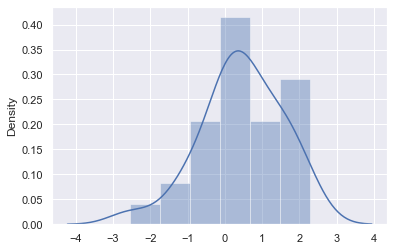

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x);

<AxesSubplot:ylabel='Density'>

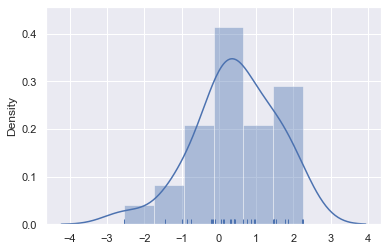

In [2]:
sns.distplot(x, rug=True)

<AxesSubplot:>

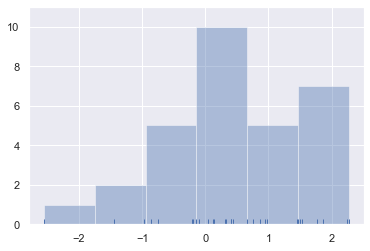

In [3]:
sns.distplot(x, kde=False, rug=True)

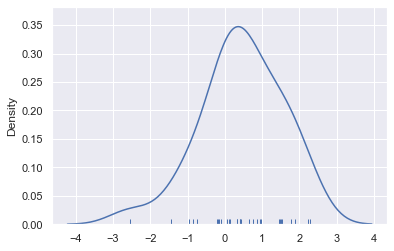

In [4]:
sns.distplot(x, hist=False, rug=True);

**개별 관측데이터에 대해 가우시안 커널 함수를 적용**

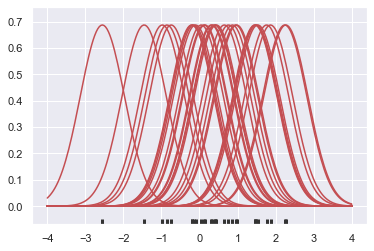

In [5]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

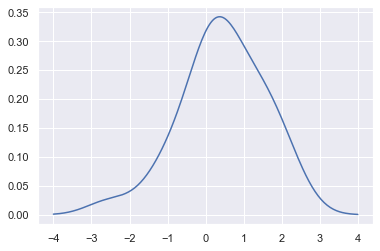

In [6]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

**seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음**

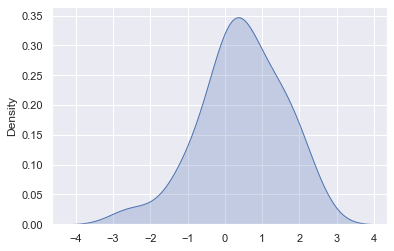

In [7]:
sns.kdeplot(x, shade=True);

**bandwidth에 따른 KDE 변화**

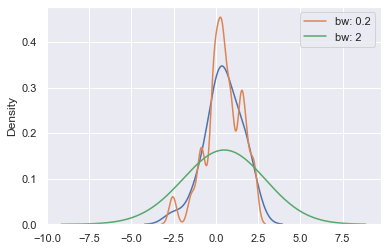

In [8]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

### 사이킷런을 이용한 Mean Shift 

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


**커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행**

In [10]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [13]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.25)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.689


In [21]:
best_bandwidth = estimate_bandwidth(X, quantile=0.25)
print(best_bandwidth)
best_bandwidth=1
print(best_bandwidth)

#meanshift= MeanShift(best_bandwidth)
meanshift= MeanShift(bandwidth=best_bandwidth)

1.6889636737559222
1


In [22]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


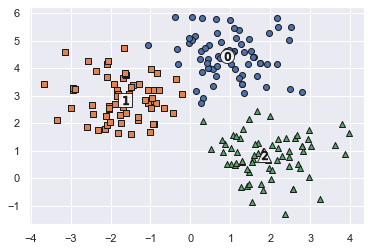

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()


In [24]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64
